<a href="https://colab.research.google.com/github/CillaCole/Project-2/blob/main/P2_Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Classification Project
- Priscilla E. Cole
- October 5, 2022

In [9]:
# import libraries
# import necessary libraires 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn import set_config
set_config(display = 'diagram')

In [2]:
# load dataset
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# checking general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
# checking for missing values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# making copy of the dataset as to not taint the original data
ml_df = df.copy()

In [7]:
# checking for any inconsistencies
dtypes = ml_df.dtypes
obj_cols = dtypes[dtypes=='object'].index
obj_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
# check for inconsistencies in categorical data
for col in obj_cols:
  print(f'-Columns={col}')
  print(df[col].value_counts(dropna=False))
  print('/n/n')

-Columns=class
e    4208
p    3916
Name: class, dtype: int64
/n/n
-Columns=cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
/n/n
-Columns=cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
/n/n
-Columns=cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
/n/n
-Columns=bruises
f    4748
t    3376
Name: bruises, dtype: int64
/n/n
-Columns=odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
/n/n
-Columns=gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
/n/n
-Columns=gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
/n/n
-Columns=gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
/n/n
-Columns=gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o   

# Preparation for Visualization and Modeling

In [11]:
# Encode categorical data for visualizations and modeling
labelencoder=LabelEncoder()
for col in ml_df.columns:
  ml_df[col]=labelencoder.fit_transform(ml_df[col])
ml_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Exploratory Visualizations

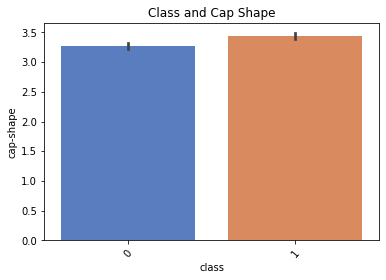

In [14]:
ml_df.style.use('seaborn')
ax = sns.barplot(data = ml_df, x = 'class', y = 'cap-shape', palette = 'muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);
ax.set_title('Class and Cap Shape');

- The bar plot does not show a definite relationship between the cap shape of the mushroom and whether it is edible or poisonous.

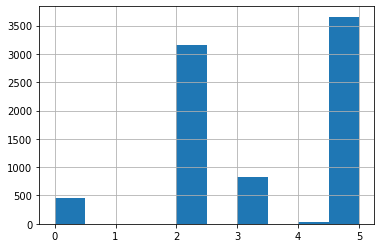

In [19]:
# create histogram to show the distribution of some of the features
ml_df['cap-shape'].hist();

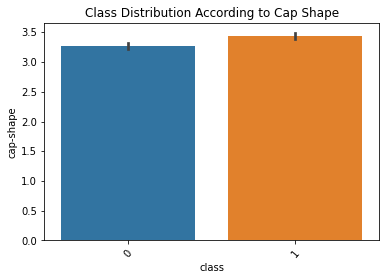

In [22]:
# 
ml_df.style.use('seaborn')
ax = sns.barplot(data = ml_df, x = 'class', y = 'cap-shape')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);
ax.set_title('Class Distribution According to Cap Shape');